In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('metal_binding_data.csv')

In [3]:
df.head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"1,2,3,4,5,6","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
2,2,P09871,MWCIVLFSLLAWVYAEPTMYGEILSPNYPQAYPSEVEKSWDIEVPE...,NaN,NaN
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
4,4,Q9ULX7,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,NaN,NaN


In [4]:
df2=df.dropna(axis=0)

In [5]:
df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)].head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"1,2,3,4,5,6","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
11,11,P51399,MPSYTVTVATGSQWFAGTDDYIYLSLIGSAGCSEKHLLDKAFYNDF...,"17,18,19,44,45,47,79,80","Calcium 1,Calcium 2,Calcium 2,Calcium 2,Calciu..."
17,17,P00433,MHFSSSSTLFTCITLIPLVCLILHASLSDAQLTPTFYDNSCPNVSN...,"73,76,78,80,82,94,201,252,255,260","Calcium 1,Calcium 1,Calcium 1,Calcium 1,Calciu..."


In [6]:
final_sequence=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['SEQUENCE']

In [7]:
final_sequence

0         MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...
1         MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...
3         MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...
11        MPSYTVTVATGSQWFAGTDDYIYLSLIGSAGCSEKHLLDKAFYNDF...
17        MHFSSSSTLFTCITLIPLVCLILHASLSDAQLTPTFYDNSCPNVSN...
                                ...                        
101350    MHTGTTLTQFIIEEQRRTAGATGDFTSLLNDVVTACKAISNAVNKG...
101351    MHTGTTLTQFIIEEQRHIAGASGDFTALLNDIVTAIKTISNAVNKG...
101352    MTSLTQYFEQHPKLPQTQAVIDVITTITNVGKQITDLLRQGALADI...
101353    MSRVTLSRYLIEQTRSNNTPADLRFLIEVVARACKEISHHVSKGAL...
101354    MQKMRTLGEFIVEKQHDFPHASGELSSLLASIRLAAKIVNREINKA...
Name: SEQUENCE, Length: 18531, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
encoded_metal=vectorizer.fit_transform(df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['METAL'])
print(vectorizer.get_feature_names_out())

['cadmium' 'calcium' 'cobalt' 'copper' 'iron' 'magnesium' 'manganese'
 'nickel' 'potassium' 'sodium' 'zinc']


In [9]:
encoded_metal.shape

(18531, 11)

In [10]:
#vectorizer.get_feature_names()[0]=='cadmium'

In [11]:
#metals=vectorizer.get_feature_names()

In [12]:
#type(metals[0])

In [13]:
metals_list=['calcium','copper','iron','magnesium','manganese','zinc']
values=[1812,213,2743,5557,2491,5532]

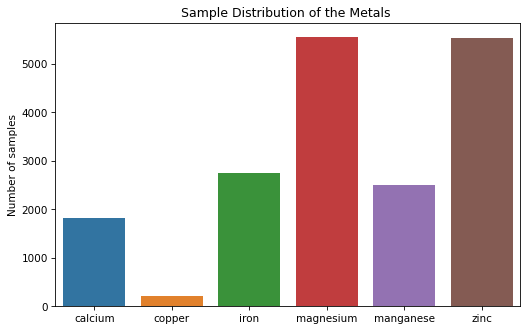

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
ax=sns.barplot(x=metals_list,y=values)
ax.set_title("Sample Distribution of the Metals ")
ax.set_ylabel("Number of samples")
#ax.set_xlabel("Number of samples")
plt.show()

In [15]:
#encoded_metal[:5000].toarray()

In [16]:
print(np.count_nonzero(encoded_metal.toarray() > 0, axis=0))

[   1 1812   10  213 2743 5557 2491  287  116   50 5532]


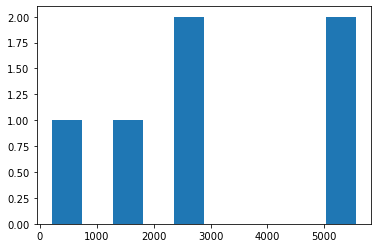

In [17]:
#!conda install -c conda-forge matplotlib
from matplotlib import pyplot as plt
plt.hist(values)
plt.show()

In [18]:
#np.save('5000_metal_emb.npy', encoded_metal[:5000].toarray())

In [20]:
embedded_sequence=np.load('ESM5000_emb.npy')
embedded_sequence2=np.load('5000_10000sequence.npy')
embedded_sequence3=np.load('10000_15000sequence.npy')
embedded_sequence4=np.load('15000_18000sequence.npy')

In [25]:
embedded_sequence11=np.vstack((embedded_sequence1, embedded_sequence2))

NameError: name 'embedded_sequence1' is not defined

In [22]:
#embedded_sequence12=np.vstack((embedded_sequence11, embedded_sequence3))

In [23]:
#embedded_sequence=np.vstack((embedded_sequence12, embedded_sequence4))

In [24]:
embedded_sequence.shape

(5000, 1280)

In [24]:
# from biotransformers import BioTransformers

# # sequences = [
# #         "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG",
# #         "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE",
# #     ]

# bio_trans = BioTransformers(backend="protbert")
# embeddings = bio_trans.compute_embeddings(final_sequence[5000:10000], pool_mode=('cls'),batch_size=64)

# cls_emb = embeddings['cls']

In [25]:
#cls_emb

In [26]:
#np.save('5000_1000_sequence.npy',cls_emb)

In [27]:
#np.array(final_site[0].split(','),int)

In [28]:
#embedded_sequence=np.load('5000_sequence_emb.npy')

In [29]:
#embedded_sequence.shape

In [30]:
final_site=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['SITES']

In [31]:
final_site

0                                               1,2,3,4,5,6
1         89,91,96,175,229,230,292,299,319,323,542,545,5...
3                                                 95,97,120
11                                  17,18,19,44,45,47,79,80
17                        73,76,78,80,82,94,201,252,255,260
                                ...                        
101350                               92,114,114,116,117,200
101351                               92,114,114,116,117,200
101352                               87,106,106,108,109,200
101353                               90,112,112,114,115,200
101354                               92,115,115,117,118,200
Name: SITES, Length: 18531, dtype: object

In [32]:
final_site.index=np.arange(18531)

In [33]:
final_site.head()

0                                          1,2,3,4,5,6
1    89,91,96,175,229,230,292,299,319,323,542,545,5...
2                                            95,97,120
3                              17,18,19,44,45,47,79,80
4                    73,76,78,80,82,94,201,252,255,260
Name: SITES, dtype: object

In [34]:
#type(final_site[0])

In [35]:
li=[]

In [36]:
for i in range(0,18531):
    li.append(np.array(final_site[i].split(','),int))

In [37]:
li=np.array(li)

C:\Users\fsshi\AppData\Local\Temp/ipykernel_26192/388172736.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  li=np.array(li)


In [38]:
type(li[0][0])

numpy.int32

In [39]:
li.shape

(18531,)

In [40]:
#np.array(final_site[0].split(','),int)

In [41]:
#type(np.array(final_site[0].split(','),int))

In [42]:
arr=np.zeros((18531, 1024))

In [43]:
arr.shape

(18531, 1024)

In [44]:
final_site[0]

'1,2,3,4,5,6'

In [45]:
for i in range(0,18531):
    for j in li[i]:
        arr[i][j]=1

In [46]:
arr.shape

(18531, 1024)

In [47]:
arr

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
#np.save('18531_sites_emb.npy', arr)

In [49]:
concatanate_sequence=np.add(embedded_sequence[:4800],arr[:4800].astype(np.int64),dtype=None)

In [50]:
concatanate_sequence

array([[ 0.15101209,  1.02546242,  1.09242898, ..., -0.04835367,
        -0.07915092,  0.04481541],
       [ 0.12256728,  0.0555306 ,  0.07029734, ..., -0.11076083,
        -0.02586194, -0.013535  ],
       [-0.00808507,  0.0127356 ,  0.02969295, ..., -0.07468386,
         0.01465157,  0.07405594],
       ...,
       [ 0.06778479,  0.01662698,  0.12585355, ..., -0.05795287,
        -0.02903252, -0.01238356],
       [ 0.10810543,  0.01887834,  0.07539117, ..., -0.04097195,
        -0.08460993,  0.07168496],
       [ 0.12621392,  0.00306712,  0.08155467, ..., -0.04035889,
        -0.07795094,  0.04873309]])

In [51]:
# # mlp for multi-label classification
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import RepeatedKFold
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.metrics import accuracy_score
 
# # get the model
# def get_model(n_inputs, n_outputs):
# 	model = Sequential()
# 	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# 	model.add(Dense(n_outputs, activation='sigmoid'))
# 	model.compile(loss='binary_crossentropy', optimizer='adam')
# 	return model
 
# # evaluate a model using repeated k-fold cross-validation
# def evaluate_model(X, y):
# 	results = list()
# 	n_inputs, n_outputs = X.shape[1], y.shape[1]
# 	# define evaluation procedure
# 	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	# enumerate folds
# 	for train_ix, test_ix in cv.split(X):
# 		# prepare data
# 		X_train, X_test = X[train_ix], X[test_ix]
# 		y_train, y_test = y[train_ix], y[test_ix]
# 		# define model
# 		model = get_model(n_inputs, n_outputs)
# 		# fit model
# 		model.fit(X_train, y_train, verbose=0, epochs=100)
# 		# make a prediction on the test set
# 		yhat = model.predict(X_test)
# 		# round probabilities to class labels
# 		yhat = yhat.round()
# 		# calculate accuracy
# 		acc = accuracy_score(y_test, yhat)
# 		#store result
# 		print('>%.3f' % acc)
# 		print(classification_report(y_test, yhat)
# 		results.append(acc)
# 	return results
 
# # load dataset

# # evaluate model
# results = evaluate_model(embedded_sequence, embedded_metal.astype(np.int64))
# # summarize performance
# print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [52]:
# # mlp for multi-label classification
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import RepeatedKFold
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.metrics import accuracy_score
 
# # get the model
# def get_model(n_inputs, n_outputs):
# 	model = Sequential()
# 	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# 	model.add(Dense(n_outputs, activation='sigmoid'))
# 	model.compile(loss='binary_crossentropy', optimizer='adam')
# 	return model
 
# # evaluate a model using repeated k-fold cross-validation
# def evaluate_model(X, y):
# 	results = list()
# 	n_inputs, n_outputs = X.shape[1], y.shape[1]
# 	# define evaluation procedure
# 	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	# enumerate folds
# 	for train_ix, test_ix in cv.split(X):
# 		# prepare data
# 		X_train, X_test = X[train_ix], X[test_ix]
# 		y_train, y_test = y[train_ix], y[test_ix]
# 		# define model
# 		model = get_model(n_inputs, n_outputs)
# 		# fit model
# 		model.fit(X_train, y_train, verbose=0, epochs=100)
# 		# make a prediction on the test set
# 		yhat = model.predict(X_test)
# 		# round probabilities to class labels
# 		yhat = yhat.round()
# 		# calculate accuracy
# 		acc = accuracy_score(y_test, yhat)
# 		# store result
# 		print('>%.3f' % acc)
# 		results.append(acc)
# 	return results
 
# # load dataset

# # evaluate model
# results = evaluate_model(embedded_sequence, arr.astype(np.int64))
# # summarize performance
# print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [53]:
# # mlp for multi-label classification
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import RepeatedKFold
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.metrics import accuracy_score
 
# # get the model
# def get_model(n_inputs, n_outputs):
# 	model = Sequential()
# 	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# 	model.add(Dense(n_outputs, activation='sigmoid'))
# 	model.compile(loss='binary_crossentropy', optimizer='adam')
# 	return model
 
# # evaluate a model using repeated k-fold cross-validation
# def evaluate_model(X, y):
# 	results = list()
# 	n_inputs, n_outputs = X.shape[1], y.shape[1]
# 	# define evaluation procedure
# 	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	# enumerate folds
# 	for train_ix, test_ix in cv.split(X):
# 		# prepare data
# 		X_train, X_test = X[train_ix], X[test_ix]
# 		y_train, y_test = y[train_ix], y[test_ix]
# 		# define model
# 		model = get_model(n_inputs, n_outputs)
# 		# fit model
# 		model.fit(X_train, y_train, verbose=0, epochs=100)
# 		# make a prediction on the test set
# 		yhat = model.predict(X_test)
# 		# round probabilities to class labels
# 		yhat = yhat.round()
# 		# calculate accuracy
# 		acc = accuracy_score(y_test, yhat)
# 		print(classification_report(y_test, yhat))
# 		# store result
# 		print('>%.3f' % acc)
# 		results.append(acc)
# 	return results
 
# # load dataset

# # evaluate model
# results = evaluate_model(concatanate_sequence, embedded_metal.astype(np.int64))
# # summarize performance
# print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [54]:
# # mlp for multi-label classification
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import RepeatedKFold
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import StratifiedKFold
 
# # get the model
# def get_model(n_inputs, n_outputs):
# 	model = Sequential()
# 	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# 	model.add(Dense(n_outputs, activation='sigmoid'))
# 	model.compile(loss='binary_crossentropy', optimizer='adam')
# 	return model
 
# # evaluate a model using repeated k-fold cross-validation
# def evaluate_model(X, y):
# 	results = list()
# 	n_inputs, n_outputs = X.shape[1], y.shape[1]
# 	# define evaluation procedure
# 	#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	skf = StratifiedKFold(n_splits=10)
# 	# enumerate folds
# 	for train_ix, test_ix in skf.split(X,np.zeros(shape=(X.shape[0], 1))):
# 		# prepare data
# 		X_train, X_test = X[train_ix], X[test_ix]
# 		y_train, y_test = y[train_ix], y[test_ix]
# 		# define model
# 		model = get_model(n_inputs, n_outputs)
# 		# fit model
# 		model.fit(X_train, y_train, verbose=0, epochs=100)
# 		model.save("model.h5")
# 		yhat = model.predict(X_test)
# 		# round probabilities to class labels
# 		yhat = yhat.round()
# 		# calculate accuracy
# 		acc = accuracy_score(y_test, yhat)
# 		print(classification_report(y_test, yhat))
# 		# store result
# 		print('Accuracy is: >%.3f' % acc)
# 		results.append(acc)
# 	return results
 
# # load dataset

# # evaluate model
# results = evaluate_model(concatanate_sequence, embedded_metal[:4800].astype(np.int64))
# # summarize performance
# print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [55]:
# from tensorflow.keras.models import load_model

In [56]:
#model = load_model('model.h5')

In [57]:
#test_data1=np.add(embedded_sequence[4800:5000],arr[4800:5000].astype(np.int64),dtype=None)

In [58]:
# yhat = model.predict(test_data1)
# yhat = yhat.round()
# acc = accuracy_score(embedded_metal[4800:5000].astype(np.int64), yhat)

In [59]:
#acc

In [60]:
#test_data2=np.add(embedded_sequence[4800:5000],arr[4600:4800].astype(np.int64),dtype=None)

In [61]:
# yhat = model.predict(test_data2)
# yhat = yhat.round()
# acc = accuracy_score(embedded_metal[4800:5000].astype(np.int64), yhat)
# print(acc)

In [62]:
# yhat

In [63]:
concatanate_sequence_final=np.add(embedded_sequence,arr.astype(np.int64),dtype=None)

In [64]:
concatanate_sequence_final.shape

(18531, 1024)

In [65]:
encoded_metal.shape

(18531, 11)

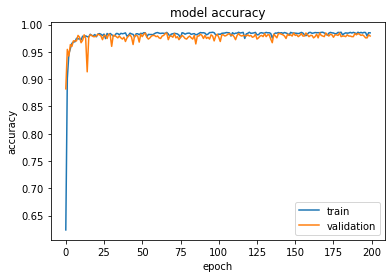

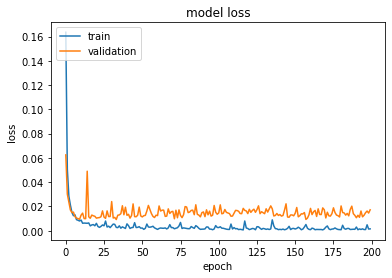

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_ran

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       105
           2       0.00      0.00      0.00         2
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         3
           5       0.96      0.82      0.88        28
           6       0.95      0.97      0.96       189
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      0.98      0.99       169

   micro avg       0.98      0.97      0.97       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.97      0.97      0.97       500
 samples avg       0.97      0.97      0.97       500



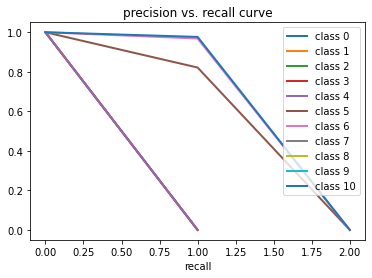

Accuracy is: >0.966


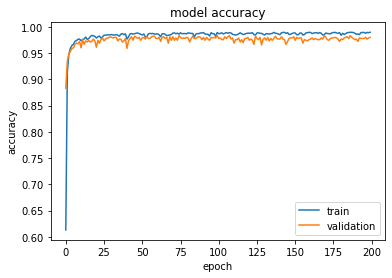

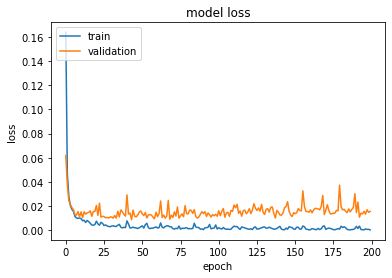

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      0.96      0.97        95
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        15
           5       0.93      0.96      0.95       128
           6       0.91      0.86      0.89        36
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       0.77      0.99      0.87       161

   micro avg       0.88      0.87      0.87       488
   macro avg       0.60      0.62      0.61       488
weighted avg       0.80      0.87      0.83       488
 samples avg       0.85      0.85      0.85       488



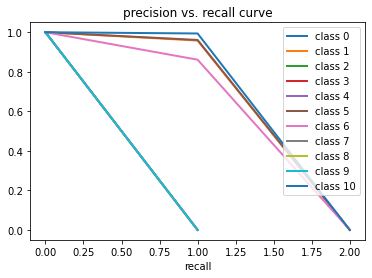

Accuracy is: >0.876


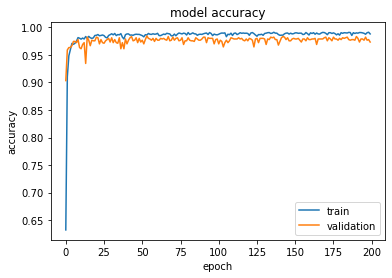

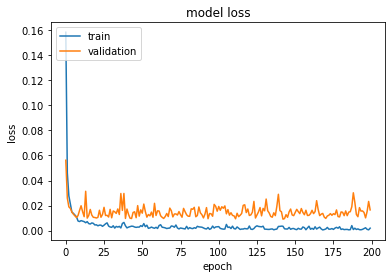

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      1.00      0.97        39
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.90      0.83      0.86        23
           5       0.95      0.99      0.97       214
           6       0.91      0.27      0.42        73
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         4
          10       0.77      0.96      0.85       130

   micro avg       0.88      0.87      0.87       483
   macro avg       0.50      0.46      0.46       483
weighted avg       0.89      0.87      0.85       483
 samples avg       0.83      0.84      0.84       483



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

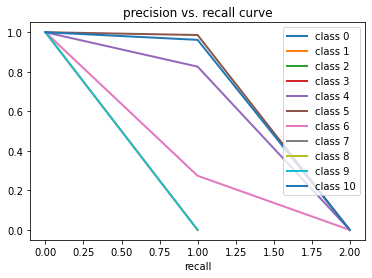

Accuracy is: >0.862


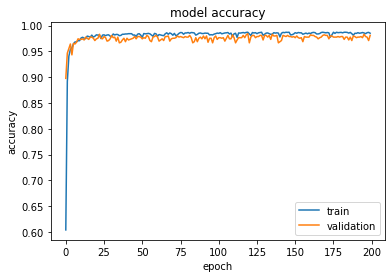

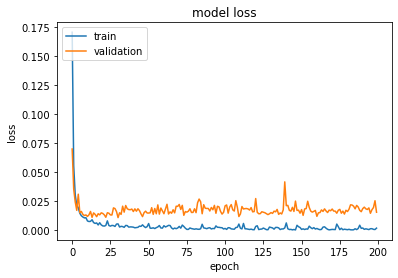

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      1.00      0.97        46
           2       0.00      0.00      0.00         0
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00       123
           5       0.98      0.96      0.97        97
           6       0.95      0.95      0.95        38
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      0.97      0.99       186

   micro avg       0.99      0.98      0.98       497
   macro avg       0.53      0.52      0.53       497
weighted avg       0.99      0.98      0.98       497
 samples avg       0.97      0.97      0.97       497



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

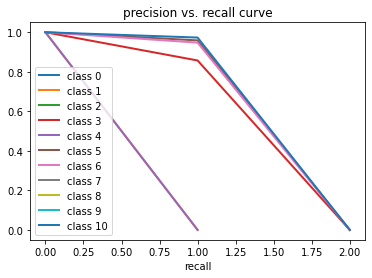

Accuracy is: >0.976


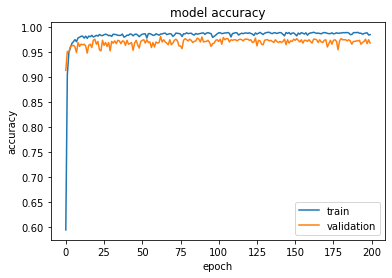

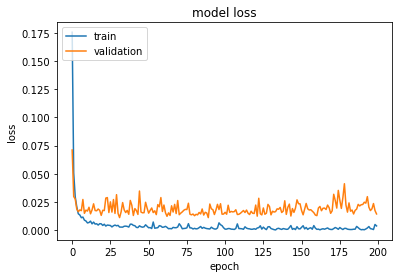

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.89      1.00      0.94        40
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        11
           4       0.99      0.99      0.99       135
           5       0.96      0.98      0.97       129
           6       0.95      0.96      0.96        57
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         0
          10       0.94      0.89      0.92       111

   micro avg       0.95      0.95      0.95       489
   macro avg       0.57      0.62      0.59       489
weighted avg       0.95      0.95      0.95       489
 samples avg       0.93      0.93      0.93       489



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

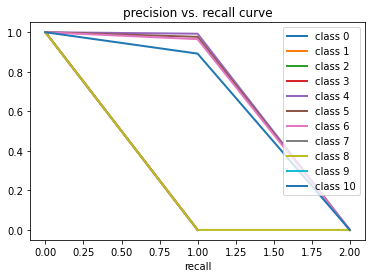

Accuracy is: >0.944


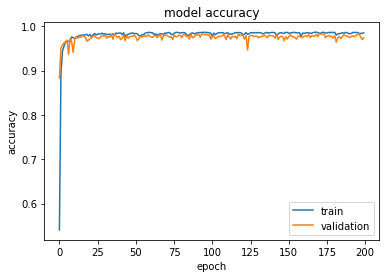

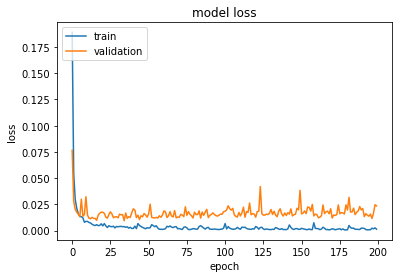

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00       218
           5       0.98      0.98      0.98        82
           6       0.93      0.93      0.93        27
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       0.99      0.99      0.99       143

   micro avg       0.99      0.99      0.99       497
   macro avg       0.72      0.71      0.71       497
weighted avg       0.99      0.99      0.99       497
 samples avg       0.98      0.98      0.98       497



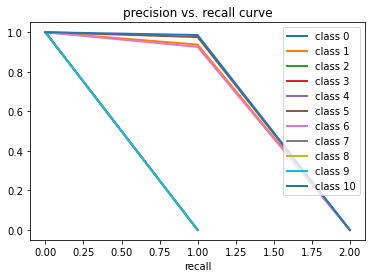

Accuracy is: >0.986


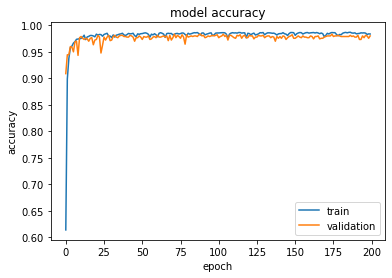

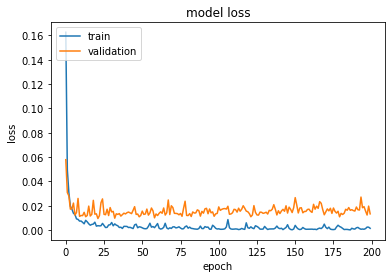

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00         1
           3       1.00      0.92      0.96        12
           4       0.99      1.00      0.99        86
           5       0.99      0.99      0.99       178
           6       0.99      0.97      0.98        86
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.99      0.97      0.98       106

   micro avg       0.99      0.98      0.98       498
   macro avg       0.72      0.71      0.71       498
weighted avg       0.99      0.98      0.98       498
 samples avg       0.98      0.98      0.98       498



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

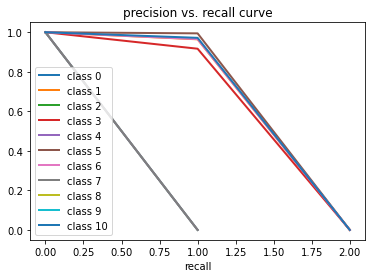

Accuracy is: >0.980


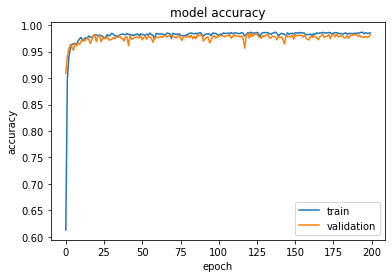

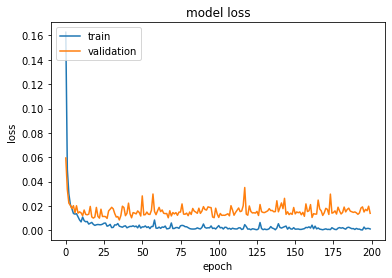

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      1.00      0.96        52
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        14
           4       1.00      0.98      0.99        95
           5       0.99      1.00      1.00       133
           6       0.98      0.99      0.98        95
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      0.95      0.98       109

   micro avg       0.99      0.98      0.98       499
   macro avg       0.63      0.63      0.63       499
weighted avg       0.99      0.98      0.98       499
 samples avg       0.98      0.98      0.98       499



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

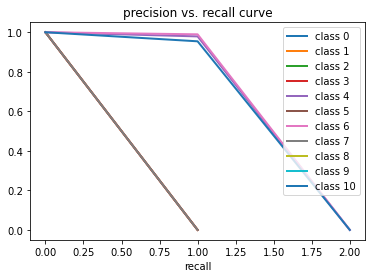

Accuracy is: >0.982


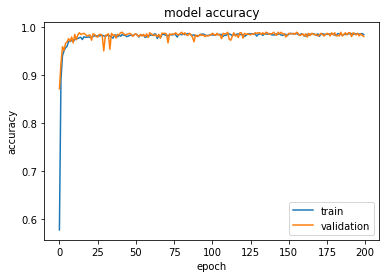

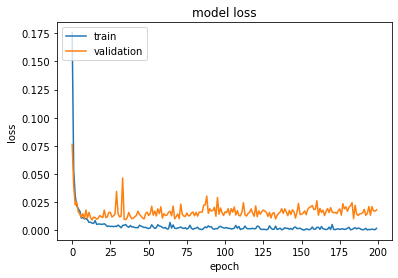

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      1.00      0.97       109
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        77
           5       0.96      0.98      0.97        93
           6       0.78      0.90      0.84        20
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       1.00      0.97      0.99       188

   micro avg       0.97      0.98      0.97       495
   macro avg       0.52      0.53      0.52       495
weighted avg       0.97      0.98      0.97       495
 samples avg       0.97      0.97      0.97       495



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_cla

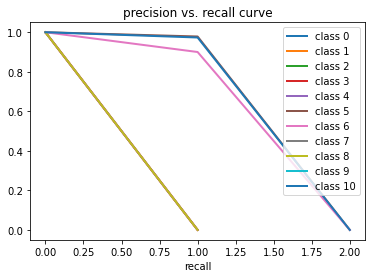

Accuracy is: >0.970


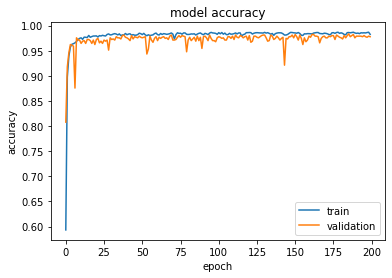

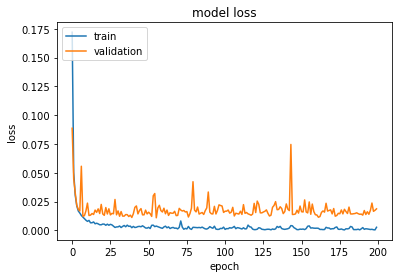

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.97      0.97      0.97        29
           2       0.00      0.00      0.00         0
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        96
           5       0.99      0.99      0.99       169
           6       1.00      0.98      0.99        57
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         1
          10       0.97      1.00      0.99       139

   micro avg       0.99      0.99      0.99       499
   macro avg       0.63      0.61      0.62       499
weighted avg       0.99      0.99      0.99       499
 samples avg       0.99      0.99      0.99       499



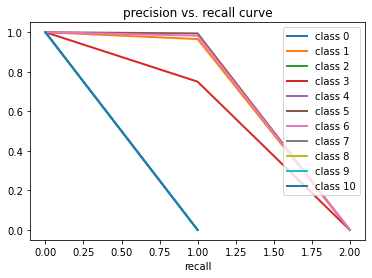

Accuracy is: >0.988
Accuracy: 0.953 (0.044)


In [15]:
# mlp for multi-label classification
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
 
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(500, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(300, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
	return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	skf = StratifiedKFold(n_splits=10)
	# enumerate folds
	for train_ix, test_ix in skf.split(X,np.zeros(shape=(X.shape[0], 1))):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		#print(y_test)
		model = get_model(n_inputs, n_outputs)
		# fit model
		history=model.fit(X_train, y_train,validation_split=0.2, verbose=0, epochs=200,)
		#model.save("protein_model.h5")
		plt.plot(history.history['accuracy'])
		plt.plot(history.history['val_accuracy'])
		plt.title('model accuracy')
		plt.ylabel('accuracy')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='lower right')
		plt.show()
		# summarize history for loss
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='upper left')
		plt.show()
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		#print(yhat)
		#print(multilabel_confusion_matrix(y_test, yhat))
		acc = accuracy_score(y_test, yhat)
		print(classification_report(y_test, yhat))
		# precision recall curve
		precision = dict()
		recall = dict()
		for i in range(11):
			precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        yhat[:, i])
			plt.plot(recall[i], lw=2, label='class {}'.format(i))    
		plt.xlabel("recall")
		#plt.ylabel("precision")
		plt.legend(loc="best")
		plt.title("precision vs. recall curve")
		plt.show()
		# store result
		print('Accuracy is: >%.3f' % acc)
		results.append(acc)
	return results
 
# load dataset

# evaluate model
results = evaluate_model(embedded_sequence, encoded_metal.toarray().astype(np.int64))
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [ ]:
precision_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\precision.xlsx')
Recall_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\Recall.xlsx')
f1_score_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\f1_score.xlsx')

In [ ]:
precision_df

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=precision_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("Precision of 10-fold validations ")
ax.set_ylabel("Precision")
ax.set_xlabel("Name of the Metals")
plt.show()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=Recall_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("Recall of 10-fold validations ")
ax.set_ylabel("Recall")
ax.set_xlabel("Name of the Metals")
plt.show()


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=f1_score_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("f1-score of 10-fold validations ")
ax.set_ylabel("f1-score")
ax.set_xlabel("Name of the Metals")
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(concatanate_sequence_final, encoded_metal.toarray().astype(np.int64), test_size=0.30, random_state=42)

In [55]:
# using Multi-label kNN classifier
mlknn_classifier = MLkNN()
mlknn_classifier.fit(X_train, y_train)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN()

In [56]:
predicted = mlknn_classifier.predict(X_test)
  
print(accuracy_score(y_test, predicted))
print(hamming_loss(y_test, predicted))

0.7341726618705036
0.03314257684761282


In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}

clf = GridSearchCV(MLkNN(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'k': 1, 's': 0.5} 0.8721763726281043


In [99]:
concatanate_sequence_final

array([[ 0.15101209,  1.02546242,  1.09242898, ..., -0.04835367,
        -0.07915092,  0.04481541],
       [ 0.12256728,  0.0555306 ,  0.07029734, ..., -0.11076083,
        -0.02586194, -0.013535  ],
       [-0.00808507,  0.0127356 ,  0.02969295, ..., -0.07468386,
         0.01465157,  0.07405594],
       ...,
       [ 0.08530541,  0.03129741,  0.06689337, ..., -0.03338583,
        -0.06570822,  0.00468705],
       [ 0.07773305,  0.02043255,  0.02849989, ..., -0.0349138 ,
        -0.06302207,  0.07373454],
       [ 0.14269534,  0.01538233,  0.08532126, ..., -0.04965088,
        -0.07019413,  0.06086601]])

In [85]:
encoded_metal.toarray().shape[0]

18531

In [90]:
ll=encoded_metal.toarray().astype(np.int64)

In [113]:
ll[-3]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [138]:
target=np.zeros((18531, 1))
for i in range(ll.shape[0]):
    for j in range(ll.shape[1]):
        if ll[i][j]==1:
            #print(j)
            target[i]=j
            
            

In [140]:
target

array([[10.],
       [ 1.],
       [10.],
       ...,
       [ 5.],
       [ 5.],
       [ 5.]])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(concatanate_sequence_final, target, test_size=0.20, random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
predictions = model.predict(X_test)

In [150]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Accuracy =  0.8454275694631778
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.85        62
         1.0       0.73      0.71      0.72       346
         2.0       0.00      0.00      0.00         1
         3.0       0.84      0.46      0.59        35
         4.0       0.93      0.84      0.88       569
         5.0       0.87      0.92      0.89      1050
         6.0       0.84      0.78      0.81       464
         7.0       1.00      0.94      0.97        63
         8.0       1.00      0.92      0.96        13
         9.0       1.00      0.33      0.50        12
        10.0       0.81      0.87      0.84      1092

    accuracy                           0.85      3707
   macro avg       0.82      0.68      0.73      3707
weighted avg       0.85      0.85      0.84      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
model2 = GaussianNB()

In [158]:
# Model training
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Actual Value: [[ 5.]
 [ 5.]
 [ 5.]
 ...
 [10.]
 [ 5.]
 [ 6.]]
Predicted Value: [10.  5. 10. ... 10.  1.  1.]


In [159]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)

Accuracy =  0.5654167790666307
              precision    recall  f1-score   support

         0.0       0.17      0.79      0.28        62
         1.0       0.32      0.60      0.42       346
         2.0       0.02      1.00      0.04         1
         3.0       0.11      0.60      0.19        35
         4.0       0.78      0.68      0.73       569
         5.0       0.84      0.39      0.53      1050
         6.0       0.58      0.59      0.59       464
         7.0       0.98      0.94      0.96        63
         8.0       1.00      0.69      0.82        13
         9.0       0.56      0.75      0.64        12
        10.0       0.67      0.62      0.65      1092

    accuracy                           0.57      3707
   macro avg       0.55      0.69      0.53      3707
weighted avg       0.68      0.57      0.59      3707



In [160]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8613434043701106


In [162]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy =  0.8613434043701106
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69        62
         1.0       0.83      0.68      0.75       346
         2.0       0.00      0.00      0.00         1
         3.0       1.00      0.34      0.51        35
         4.0       0.99      0.81      0.89       569
         5.0       0.86      0.95      0.90      1050
         6.0       0.92      0.77      0.84       464
         7.0       1.00      0.94      0.97        63
         8.0       1.00      0.92      0.96        13
         9.0       1.00      0.17      0.29        12
        10.0       0.79      0.93      0.86      1092

    accuracy                           0.86      3707
   macro avg       0.85      0.64      0.70      3707
weighted avg       0.87      0.86      0.86      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)


C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [164]:
yy=neigh.predict(X_test)

In [165]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, yy))
print(classification_report(y_test, yy))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yy)

Accuracy =  0.8478554086862692
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79        62
         1.0       0.79      0.73      0.76       346
         2.0       0.00      0.00      0.00         1
         3.0       0.35      0.43      0.38        35
         4.0       0.92      0.89      0.90       569
         5.0       0.75      0.96      0.84      1050
         6.0       0.93      0.78      0.85       464
         7.0       0.98      0.97      0.98        63
         8.0       1.00      0.92      0.96        13
         9.0       0.83      0.42      0.56        12
        10.0       0.95      0.79      0.86      1092

    accuracy                           0.85      3707
   macro avg       0.75      0.71      0.72      3707
weighted avg       0.86      0.85      0.85      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=5, learning_rate=.1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [170]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)

Accuracy =  0.7642298354464526
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        62
         1.0       0.72      0.56      0.63       346
         2.0       0.00      0.00      0.00         1
         3.0       0.94      0.46      0.62        35
         4.0       0.95      0.75      0.84       569
         5.0       0.76      0.86      0.80      1050
         6.0       0.83      0.61      0.70       464
         7.0       0.92      0.97      0.95        63
         8.0       0.92      0.85      0.88        13
         9.0       1.00      0.83      0.91        12
        10.0       0.68      0.81      0.74      1092

    accuracy                           0.76      3707
   macro avg       0.79      0.67      0.72      3707
weighted avg       0.78      0.76      0.76      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

In [185]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(concatanate_sequence_final) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18531 samples in 0.016s...
[t-SNE] Computed neighbors for 18531 samples in 12.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18531
[t-SNE] Computed conditional probabilities for sample 2000 / 18531
[t-SNE] Computed conditional probabilities for sample 3000 / 18531
[t-SNE] Computed conditional probabilities for sample 4000 / 18531
[t-SNE] Computed conditional probabilities for sample 5000 / 18531
[t-SNE] Computed conditional probabilities for sample 6000 / 18531
[t-SNE] Computed conditional probabilities for sample 7000 / 18531
[t-SNE] Computed conditional probabilities for sample 8000 / 18531
[t-SNE] Computed conditional probabilities for sample 9000 / 18531
[t-SNE] Computed conditional probabilities for sample 10000 / 18531
[t-SNE] Computed conditional probabilities for sample 11000 / 18531
[t-SNE] Computed conditional probabilities for sample 12000 / 18531
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'Protein sequence in T-SNE projection')]

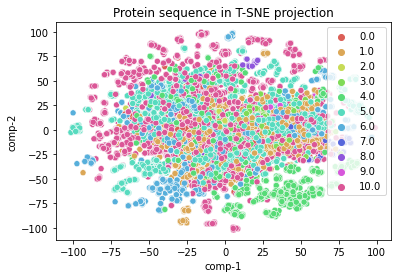

In [186]:
import pandas as pd
df = pd.DataFrame()
#df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=target.flatten(),
                palette=sns.color_palette("hls", 11),
                data=df).set(title="Protein sequence in T-SNE projection")

In [178]:
y_train.shape

(14824, 1)